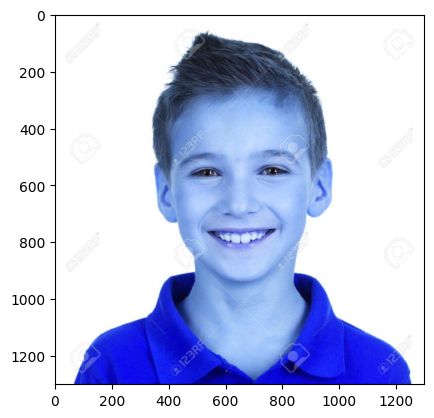

In [3]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

img = cv2.imread("D:/HappyBoy.jpg")
plt.imshow(img)

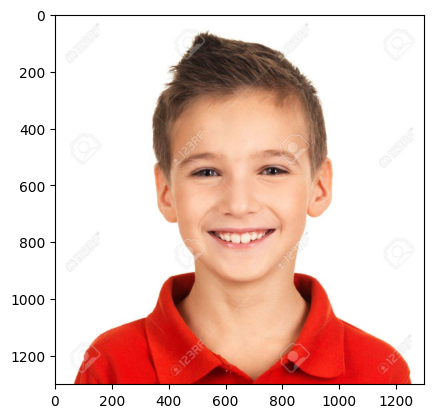

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
predictions = DeepFace.analyze(img)

age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\Lenovo\.deepface\weights\age_model_weights.h5
100%|██████████| 539M/539M [02:25<00:00, 3.71MB/s] 


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\Lenovo\.deepface\weights\gender_model_weights.h5
100%|██████████| 537M/537M [02:16<00:00, 3.92MB/s] 


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\Lenovo\.deepface\weights\race_model_single_batch.h5
100%|██████████| 537M/537M [02:17<00:00, 3.90MB/s] 
Action: race: 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]   


In [6]:
predictions

[{'emotion': {'angry': 6.317987941092009e-17,
   'disgust': 1.7969269289107649e-22,
   'fear': 7.814250838824324e-15,
   'happy': 100.0,
   'sad': 1.3446259461297465e-13,
   'surprise': 1.0394309755089575e-13,
   'neutral': 9.137076872889338e-07},
  'dominant_emotion': 'happy',
  'region': {'x': 322, 'y': 297, 'w': 656, 'h': 656},
  'age': 22,
  'gender': {'Woman': 0.3378744004294276, 'Man': 99.66212511062622},
  'dominant_gender': 'Man',
  'race': {'asian': 0.03971346541462632,
   'indian': 0.16112694080185538,
   'black': 0.004296861408510367,
   'white': 75.11289567428206,
   'middle eastern': 13.401969575999354,
   'latino hispanic': 11.280003117323108},
  'dominant_race': 'white'}]

In [10]:
predictions[0]['dominant_emotion']

'happy'

In [15]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can not open Web Cam")
    
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)

    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    
    # Draw Rectangle around Face
    for(x, w, y, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    # Inserting Text in Video
    cv2.putText(frame,
                result[0]['dominant_emotion'],
                (50,50),
                font, 3,
                (0, 0, 255),
                2,
                cv2.LINE_4)
    
    cv2.imshow('Demo Video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 12.38it/s]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.94it/s]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.46it/s]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.07it/s]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.11it/s]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.42it/s]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.91it/s]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.30it/s]


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]
